In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv


In [3]:
data = pd.read_csv("dataset1.csv") 

In [4]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [5]:
# count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).
# hate_speech = number of CF users who judged the tweet to be hate speech.
# offensive_language = number of CF users who judged the tweet to be offensive.
# neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.
# class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [6]:
hate = data.where((data['class'] == 2))

In [7]:
hate.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0.0,3.0,0.0,0.0,3.0,2.0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


In [10]:
#count the number of each class
import matplotlib.pyplot as plt
data['class'].hist

<bound method hist_series of 0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64>

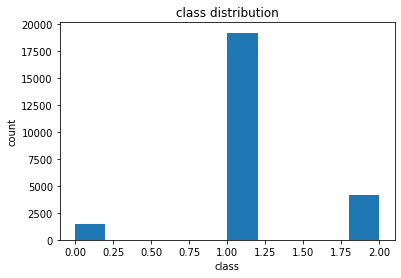

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data['class'])
plt.title('class distribution')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

In [12]:
#import numpy as np
#import pandas as pd
data = data.rename(columns={'Unnamed: 0':'id'})
data.head()

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [13]:
data.groupby('class').count()[['id']]

,id
class,
0,1430
1,19190
2,4163


In [14]:
data['class'].replace(0, 1, inplace=True)
data['class'].replace(2, 0, inplace=True)

In [15]:

data.head()

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


hate speech or offensive language : 20620
neigher :  4163


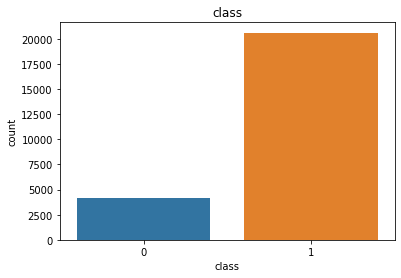

In [16]:
import seaborn as sns
y = data['class']
F, T = y.value_counts()

fig1 = sns.countplot(y,label = 'count')
plt.title('class')
plot = fig1.get_figure()
plot.savefig('Count Plot.png')

print('hate speech or offensive language :',F)
print('neigher : ',T)

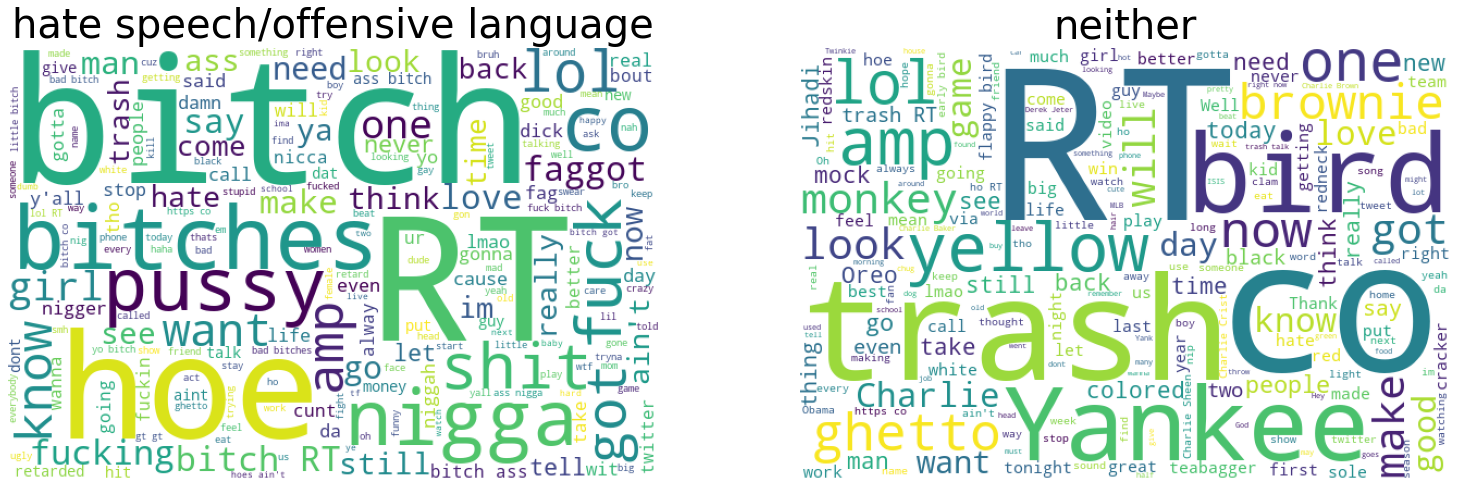

In [17]:
from wordcloud import WordCloud

hatespeech = data[data['class']==1]['tweet']
neither = data[data['class']==0]['tweet']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(hatespeech))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('hate speech/offensive language',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neither))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('neither',fontsize=40);

In [18]:
# remove puctunations, https
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
data_clean = clean_text(data, 'tweet')
data_clean.head()

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,rt as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,1,3,0,3,0,1,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,2,3,0,3,0,1,rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit
3,3,3,0,2,1,1,rt ganderson based she look like a tranny
4,4,6,0,6,0,1,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361


In [19]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [20]:

#remove stopwords
stop = stopwords.words('english')
data_clean['tweet'] = data_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,rt woman shouldnt complain cleaning house amp man always take trash
1,1,3,0,3,0,1,rt boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,2,3,0,3,0,1,rt dawg rt ever fuck bitch start cry confused shit
3,3,3,0,2,1,1,rt ganderson based look like tranny
4,4,6,0,6,0,1,rt shit hear might true might faker bitch told ya 57361


In [21]:
 from textblob import TextBlob
 b = TextBlob("I havv goood speling!")
 print(b.correct())

I have good spelling!


In [22]:
text = TextBlob(data_clean['tweet'][3])
text.correct()
#text.sentiment

TextBlob("it anderson based look like tyranny")

In [23]:
# lemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizer_(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data_clean['tweet'] = data_clean['tweet'].apply(lambda x: lemmatizer_(x))

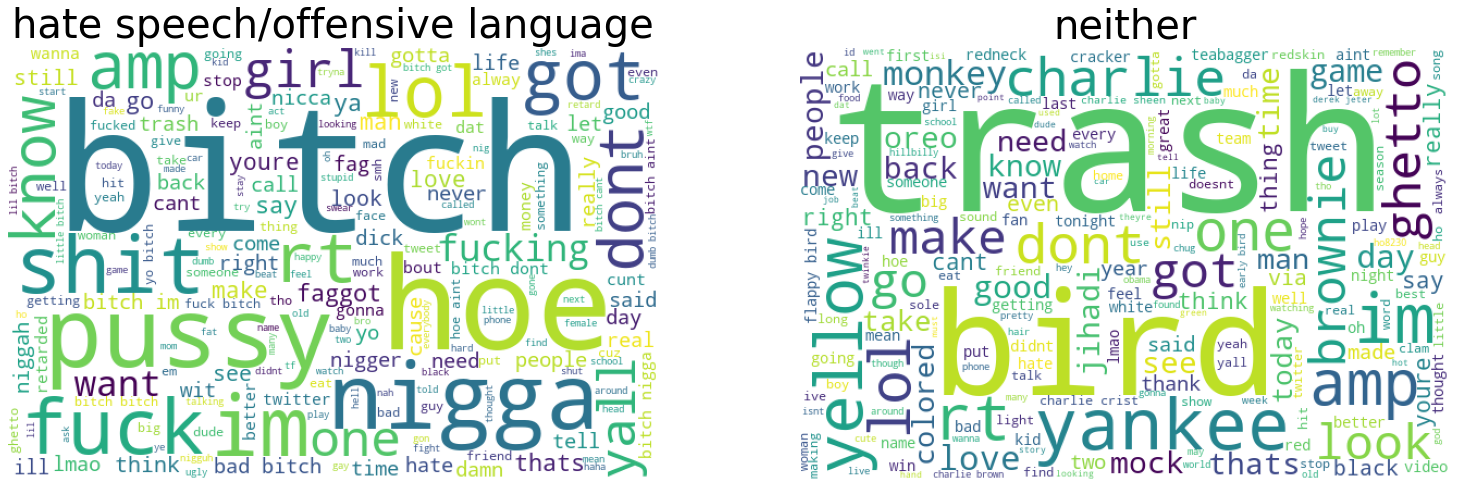

In [24]:
hatespeech = data[data['class']==1]['tweet']
neither = data[data['class']==0]['tweet']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(hatespeech))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('hate speech/offensive language',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neither))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('neither',fontsize=40);

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['tweet'],data_clean['class'],train_size = 600, random_state = 0)
#If train_size is None, it will be set to 0.25.

In [26]:
X_train.count

<bound method Series.count of 9040     facebook fag                                                                                             
9961     hustling aint everybody either jus like certain niccas cant hoop play football certain niccas cant hustle
20192    old soul like young bitch                                                                                
4876     bet valerie jarret hand humanitarian crisis didnt vote commie bitch                                      
20129    pussy popz severely                                                                                      
                ...                                                                                               
13123    partna mississippi told 2weeks ago got 2 week fuck ok hoe 2014 im stepping game 128514128514128514       
19648    wish pretty colored eye                                                                                  
9845     hoe bandwagon bitch gaggin jet laggin aap

In [27]:
X_test.count

<bound method Series.count of 4129     momma hello dare momma show glad dat u follow u lbe screamin hot dem pitcher eva b wit colored men
15081    shoutout main bitch                                                                               
16547    throw like pizza get stirring pussy like feature 128514128514128514 ndyy                          
4273     nunb search gay redneck episode 1 play                                                            
4254     u still mutt tho lol                                                                              
                 ...                                                                                       
6874     bitch as nigga called bitch                                                                       
21104    sooo first aidcpr certification came handy tonight glad didnt lose monkey                         
9354     g hoe motherfucker bounce                                                                        

In [28]:
y_train

9040     1
9961     1
20192    1
4876     1
20129    1
        ..
13123    1
19648    0
9845     1
10799    1
2732     1
Name: class, Length: 600, dtype: int64

In [29]:
X_train

9040     facebook fag                                                                                             
9961     hustling aint everybody either jus like certain niccas cant hoop play football certain niccas cant hustle
20192    old soul like young bitch                                                                                
4876     bet valerie jarret hand humanitarian crisis didnt vote commie bitch                                      
20129    pussy popz severely                                                                                      
                ...                                                                                               
13123    partna mississippi told 2weeks ago got 2 week fuck ok hoe 2014 im stepping game 128514128514128514       
19648    wish pretty colored eye                                                                                  
9845     hoe bandwagon bitch gaggin jet laggin aap                              

In [30]:
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(X_train)#  fit_transform(raw_documents[, y]) : Learn vocabulary and idf, return document-term matrix.
test_tfidf = tfidf.transform(X_test) # transform(raw_documents[, copy]) : Transform documents to document-term matrix.

In [31]:
train_tfidf.shape

(600, 2187)

In [32]:
train_tfidf[0]

<1x2187 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [33]:
test_tfidf.shape

(24183, 2187)

In [34]:
test_tfidf[0]

<1x2187 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [35]:
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(X_train) # fit_transform(raw_documents[, y])  Learn the vocabulary dictionary and return document-term matrix.
test_vectors = count_vectorizer.transform(X_test) # transform(raw_documents)  Transform documents to document-term matrix.

In [36]:
train_vectors.shape

(600, 2187)

In [37]:
train_vectors[0]

<1x2187 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [38]:
test_vectors.shape

(24183, 2187)

In [39]:
test_vectors[0]

<1x2187 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [40]:
# NB and TFIDF
pipeline_1 = Pipeline([
    
    ('tfidf', TfidfVectorizer()),  
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
model1 = pipeline_1.fit(X_train, y_train)

y_predict1 = model1.predict(X_test)
print(classification_report(y_test, y_predict1,digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.0173    0.0339      4057
           1     0.8347    1.0000    0.9099     20126

    accuracy                         0.8351     24183
   macro avg     0.9173    0.5086    0.4719     24183
weighted avg     0.8624    0.8351    0.7629     24183



In [41]:
confusion_matrix(y_test, y_predict1)

array([[   70,  3987],
       [    0, 20126]])

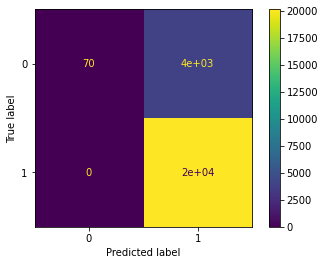

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)  

In [43]:
# NB and COUNT
pipeline_11 = Pipeline([
    
    ('countv', CountVectorizer()),  
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
model11 = pipeline_11.fit(X_train, y_train)

y_predict11 = model11.predict(X_test)
print(classification_report(y_test, y_predict11,digits = 4))

              precision    recall  f1-score   support

           0     0.8874    0.3340    0.4853      4057
           1     0.8807    0.9915    0.9328     20126

    accuracy                         0.8812     24183
   macro avg     0.8840    0.6627    0.7091     24183
weighted avg     0.8818    0.8812    0.8577     24183



In [44]:
confusion_matrix(y_test, y_predict11)

array([[ 1355,  2702],
       [  172, 19954]])

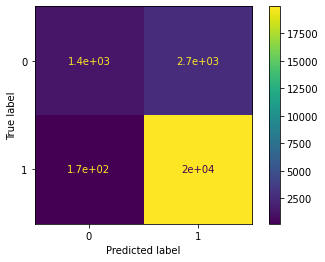

In [45]:
plot_confusion_matrix(model11, X_test, y_test) 

In [46]:
# TfidfVectorizer and SGD classifier
pipeline_2 = Pipeline([
    ('tfidf',  TfidfVectorizer()),
    ('classifier', SGDClassifier()),
])
model2 = pipeline_2.fit(X_train, y_train)


y_predict2 = model2.predict(X_test)
print(classification_report(y_test, y_predict2,digits = 4))

              precision    recall  f1-score   support

           0     0.7898    0.5593    0.6548      4057
           1     0.9161    0.9700    0.9423     20126

    accuracy                         0.9011     24183
   macro avg     0.8529    0.7646    0.7986     24183
weighted avg     0.8949    0.9011    0.8941     24183



In [47]:
confusion_matrix(y_test, y_predict2)

array([[ 2269,  1788],
       [  604, 19522]])

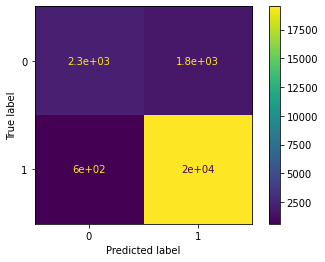

In [48]:
plot_confusion_matrix(model2, X_test, y_test)  

In [49]:
# CountVectorizer and SGD classifier
pipeline_22 = Pipeline([
    ('countv',  CountVectorizer()),
    ('classifier', SGDClassifier()),
])
model22 = pipeline_22.fit(X_train, y_train)


y_predict22 = model22.predict(X_test)
print(classification_report(y_test, y_predict22,digits = 4))

              precision    recall  f1-score   support

           0     0.7783    0.5738    0.6606      4057
           1     0.9184    0.9671    0.9421     20126

    accuracy                         0.9011     24183
   macro avg     0.8484    0.7704    0.8014     24183
weighted avg     0.8949    0.9011    0.8949     24183



In [50]:
confusion_matrix(y_test, y_predict22)

array([[ 2328,  1729],
       [  663, 19463]])

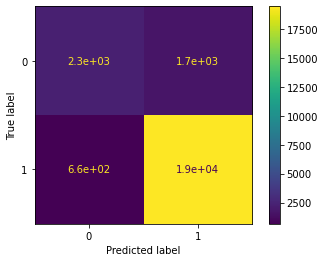

In [51]:
plot_confusion_matrix(model22, X_test, y_test)

In [52]:
#Logistic Regression and TFIDF
pipeline_3 = Pipeline([
    ('tfidf', TfidfVectorizer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ LogisticRegression classifier
])
model3 = pipeline_3.fit(X_train, y_train)


y_predict3 = model3.predict(X_test)
print(classification_report(y_test, y_predict3,digits = 4))

              precision    recall  f1-score   support

           0     0.8488    0.0540    0.1015      4057
           1     0.8396    0.9981    0.9120     20126

    accuracy                         0.8397     24183
   macro avg     0.8442    0.5260    0.5067     24183
weighted avg     0.8411    0.8397    0.7760     24183



In [53]:
confusion_matrix(y_test, y_predict3)

array([[  219,  3838],
       [   39, 20087]])

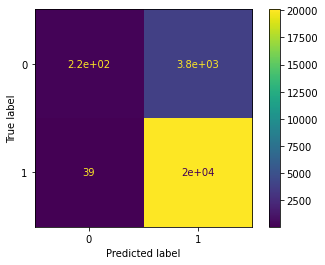

In [54]:
plot_confusion_matrix(model3, X_test, y_test)

In [55]:
#Logistic Regression and CountV
pipeline_33 = Pipeline([
    ('tfidf', CountVectorizer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ LogisticRegression classifier
])
model33 = pipeline_33.fit(X_train, y_train)

y_predict33 = model33.predict(X_test)
print(classification_report(y_test, y_predict33,digits = 4))

              precision    recall  f1-score   support

           0     0.8087    0.4469    0.5756      4057
           1     0.8977    0.9787    0.9365     20126

    accuracy                         0.8895     24183
   macro avg     0.8532    0.7128    0.7561     24183
weighted avg     0.8828    0.8895    0.8759     24183



In [56]:
confusion_matrix(y_test, y_predict33)

array([[ 1813,  2244],
       [  429, 19697]])

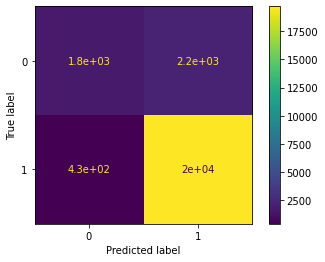

In [57]:
plot_confusion_matrix(model33, X_test, y_test)